In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)

train= pd.read_csv('train.csv')
test= pd.read_csv('test.csv')

print(train.shape, test.shape)

(1108, 22) (1108, 21)


In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1108 non-null   int64  
 1   Year_Birth           1108 non-null   int64  
 2   Education            1108 non-null   object 
 3   Marital_Status       1108 non-null   object 
 4   Income               1108 non-null   float64
 5   Kidhome              1108 non-null   int64  
 6   Teenhome             1108 non-null   int64  
 7   Dt_Customer          1108 non-null   object 
 8   Recency              1108 non-null   int64  
 9   NumDealsPurchases    1108 non-null   int64  
 10  NumWebPurchases      1108 non-null   int64  
 11  NumCatalogPurchases  1108 non-null   int64  
 12  NumStorePurchases    1108 non-null   int64  
 13  NumWebVisitsMonth    1108 non-null   int64  
 14  AcceptedCmp3         1108 non-null   int64  
 15  AcceptedCmp4         1108 non-null   i

In [3]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1108 non-null   int64  
 1   Year_Birth           1108 non-null   int64  
 2   Education            1108 non-null   object 
 3   Marital_Status       1108 non-null   object 
 4   Income               1108 non-null   float64
 5   Kidhome              1108 non-null   int64  
 6   Teenhome             1108 non-null   int64  
 7   Dt_Customer          1108 non-null   object 
 8   Recency              1108 non-null   int64  
 9   NumDealsPurchases    1108 non-null   int64  
 10  NumWebPurchases      1108 non-null   int64  
 11  NumCatalogPurchases  1108 non-null   int64  
 12  NumStorePurchases    1108 non-null   int64  
 13  NumWebVisitsMonth    1108 non-null   int64  
 14  AcceptedCmp3         1108 non-null   int64  
 15  AcceptedCmp4         1108 non-null   i

In [4]:
train.head()

,id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target
0,0,1974,Master,Together,46014.0,1,1,21-01-2013,21,10,7,1,8,7,0,0,0,0,0,0,0,541
1,1,1962,Graduation,Single,76624.0,0,1,24-05-2014,68,1,5,10,7,1,1,0,0,0,0,0,0,899
2,2,1951,Graduation,Married,75903.0,0,1,08-04-2013,50,2,6,6,9,3,0,0,0,0,0,0,0,901
3,3,1974,Basic,Married,18393.0,1,0,29-03-2014,2,2,3,0,3,8,0,0,0,0,0,0,0,50
4,4,1946,PhD,Together,64014.0,2,1,10-06-2014,56,7,8,2,5,7,0,0,0,1,0,0,0,444


In [5]:
train.drop('id', axis= 1, inplace= True)
test.drop('id', axis= 1, inplace= True)

train.shape, test.shape

((1108, 21), (1108, 20))

In [6]:
train.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target
0,1974,Master,Together,46014.0,1,1,21-01-2013,21,10,7,1,8,7,0,0,0,0,0,0,0,541
1,1962,Graduation,Single,76624.0,0,1,24-05-2014,68,1,5,10,7,1,1,0,0,0,0,0,0,899
2,1951,Graduation,Married,75903.0,0,1,08-04-2013,50,2,6,6,9,3,0,0,0,0,0,0,0,901
3,1974,Basic,Married,18393.0,1,0,29-03-2014,2,2,3,0,3,8,0,0,0,0,0,0,0,50
4,1946,PhD,Together,64014.0,2,1,10-06-2014,56,7,8,2,5,7,0,0,0,1,0,0,0,444


In [7]:
train['Dt_Customer']= pd.to_datetime(train['Dt_Customer'])
test['Dt_Customer']= pd.to_datetime(test['Dt_Customer'])

train.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target
0,1974,Master,Together,46014.0,1,1,2013-01-21,21,10,7,1,8,7,0,0,0,0,0,0,0,541
1,1962,Graduation,Single,76624.0,0,1,2014-05-24,68,1,5,10,7,1,1,0,0,0,0,0,0,899
2,1951,Graduation,Married,75903.0,0,1,2013-08-04,50,2,6,6,9,3,0,0,0,0,0,0,0,901
3,1974,Basic,Married,18393.0,1,0,2014-03-29,2,2,3,0,3,8,0,0,0,0,0,0,0,50
4,1946,PhD,Together,64014.0,2,1,2014-10-06,56,7,8,2,5,7,0,0,0,1,0,0,0,444


<AxesSubplot:xlabel='Year_Birth', ylabel='target'>

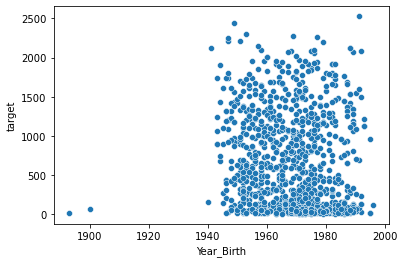

In [8]:
sns.scatterplot(data= train, x= 'Year_Birth', y= 'target')

In [9]:
train[train['Year_Birth']<= 1900]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target
760,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,1,2,1,2,5,0,0,0,0,0,1,0,65
865,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,1,1,0,2,4,0,0,0,0,0,0,0,22


In [10]:
train.drop([760, 865], axis= 0, inplace= True)
train.shape

(1106, 21)

<AxesSubplot:>

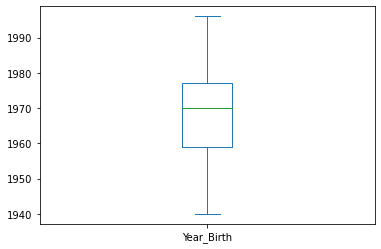

In [11]:
train.Year_Birth.plot.box()

<AxesSubplot:xlabel='Income', ylabel='target'>

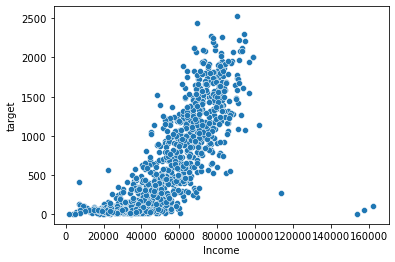

In [12]:
sns.scatterplot(data= train, x= 'Income', y= 'target')

In [13]:
train[train['Income']> 140000]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target
246,1976,PhD,Together,162397.0,1,1,2013-03-06,31,0,0,0,1,1,0,0,0,0,0,0,0,107
686,1975,Graduation,Divorced,153924.0,0,0,2014-07-02,81,0,0,0,0,0,0,0,0,0,0,0,0,6
730,1971,Master,Together,157733.0,1,0,2013-04-06,37,0,1,0,1,1,0,0,0,0,0,0,0,59


<AxesSubplot:>

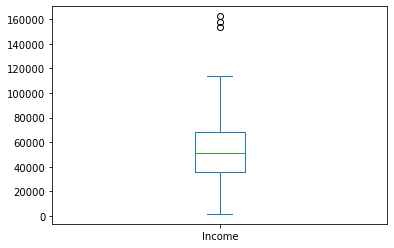

In [14]:
train.Income.plot.box()

<AxesSubplot:>

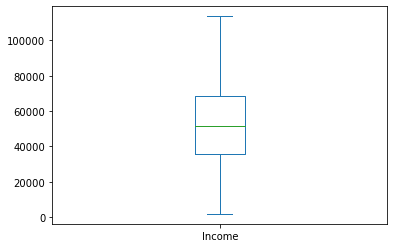

In [15]:
train.drop([246, 686, 730], axis= 0, inplace= True)
train.Income.plot.box()

In [16]:
def scatter_box(df, x_col, y_col) :
    fig, ax= plt.subplots(1, 2, figsize= (12, 5))
    sns.scatterplot(data= df, x= x_col, y= y_col, ax= ax[0])
    train[x_col].plot.box(ax= ax[1])

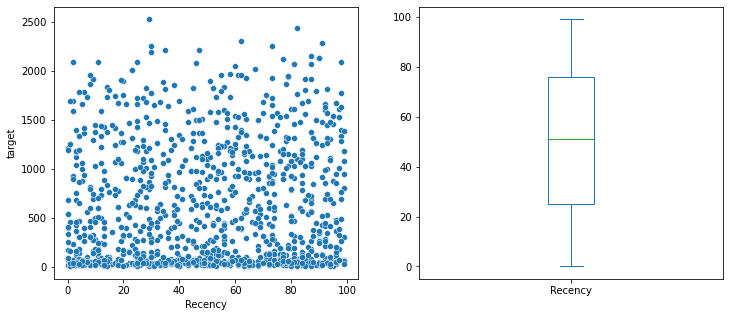

In [17]:
scatter_box(train, 'Recency', 'target')

In [18]:
train.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target
0,1974,Master,Together,46014.0,1,1,2013-01-21,21,10,7,1,8,7,0,0,0,0,0,0,0,541
1,1962,Graduation,Single,76624.0,0,1,2014-05-24,68,1,5,10,7,1,1,0,0,0,0,0,0,899
2,1951,Graduation,Married,75903.0,0,1,2013-08-04,50,2,6,6,9,3,0,0,0,0,0,0,0,901
3,1974,Basic,Married,18393.0,1,0,2014-03-29,2,2,3,0,3,8,0,0,0,0,0,0,0,50
4,1946,PhD,Together,64014.0,2,1,2014-10-06,56,7,8,2,5,7,0,0,0,1,0,0,0,444


<AxesSubplot:>

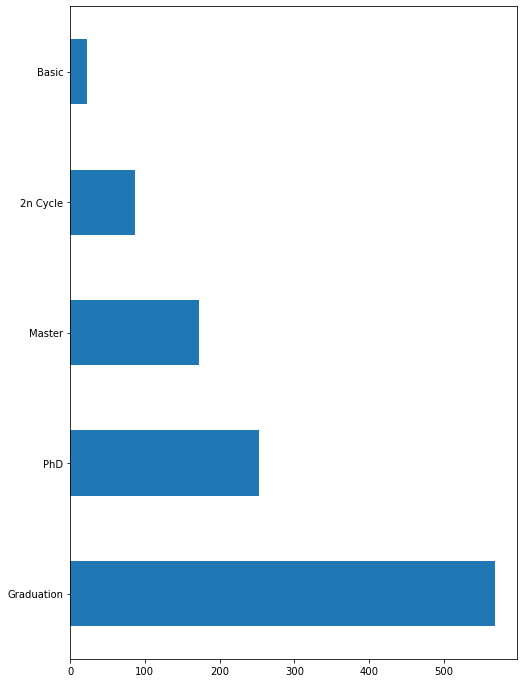

In [19]:
train.Education.value_counts().plot.barh(figsize= (8, 12))

In [20]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
train['Education']= le.fit_transform(train['Education'])

<AxesSubplot:>

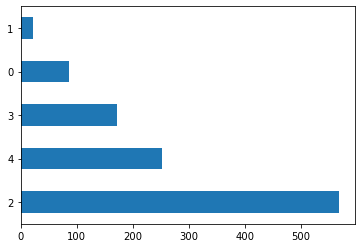

In [21]:
train.Education.value_counts().plot.barh()

In [22]:
train.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target
0,1974,3,Together,46014.0,1,1,2013-01-21,21,10,7,1,8,7,0,0,0,0,0,0,0,541
1,1962,2,Single,76624.0,0,1,2014-05-24,68,1,5,10,7,1,1,0,0,0,0,0,0,899
2,1951,2,Married,75903.0,0,1,2013-08-04,50,2,6,6,9,3,0,0,0,0,0,0,0,901
3,1974,1,Married,18393.0,1,0,2014-03-29,2,2,3,0,3,8,0,0,0,0,0,0,0,50
4,1946,4,Together,64014.0,2,1,2014-10-06,56,7,8,2,5,7,0,0,0,1,0,0,0,444


In [23]:
def label_encoding(df, col) :
    le= LabelEncoder()
    train[col]= le.fit_transform(train[col])

In [24]:
label_encoding(train, 'Marital_Status')

In [25]:
train.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target
0,1974,3,5,46014.0,1,1,2013-01-21,21,10,7,1,8,7,0,0,0,0,0,0,0,541
1,1962,2,4,76624.0,0,1,2014-05-24,68,1,5,10,7,1,1,0,0,0,0,0,0,899
2,1951,2,3,75903.0,0,1,2013-08-04,50,2,6,6,9,3,0,0,0,0,0,0,0,901
3,1974,1,3,18393.0,1,0,2014-03-29,2,2,3,0,3,8,0,0,0,0,0,0,0,50
4,1946,4,5,64014.0,2,1,2014-10-06,56,7,8,2,5,7,0,0,0,1,0,0,0,444


In [26]:
train['year_week']= train.Dt_Customer.dt.strftime('%Y-%U')
test['year_week']= test.Dt_Customer.dt.strftime('%Y-%U')

train.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target,year_week
0,1974,3,5,46014.0,1,1,2013-01-21,21,10,7,1,8,7,0,0,0,0,0,0,0,541,2013-03
1,1962,2,4,76624.0,0,1,2014-05-24,68,1,5,10,7,1,1,0,0,0,0,0,0,899,2014-20
2,1951,2,3,75903.0,0,1,2013-08-04,50,2,6,6,9,3,0,0,0,0,0,0,0,901,2013-31
3,1974,1,3,18393.0,1,0,2014-03-29,2,2,3,0,3,8,0,0,0,0,0,0,0,50,2014-12
4,1946,4,5,64014.0,2,1,2014-10-06,56,7,8,2,5,7,0,0,0,1,0,0,0,444,2014-40


In [27]:
print(train.Dt_Customer.min(), train.Dt_Customer.max())

2012-01-08 00:00:00 2014-12-05 00:00:00


In [29]:
train.Teenhome.describe()

count    1103.000000
mean        0.512239
std         0.551836
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: Teenhome, dtype: float64